In [2]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib as mpl

### 循环读取文件

In [3]:
import os
rootdir = './test1/'
list = os.listdir(rootdir) #列出文件夹下所有的目录与文件

In [94]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
temp = ds['ts'][0, 0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    temp = temp + ds['ts'][0, 0]
temp = temp/len(list)

In [89]:
#save temp for comparation in next two experience
np.savetxt('Ctrl_86-90Temp.csv',temp, fmt='%.8f',delimiter=',')

## 地表投影类

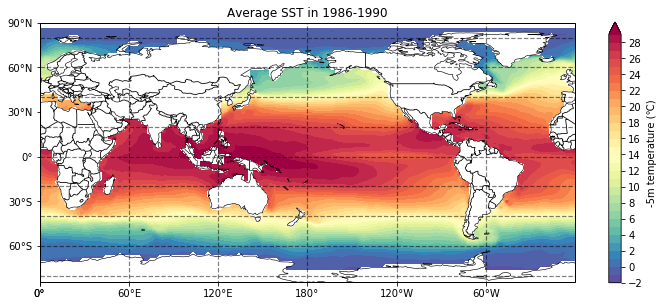

In [20]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': '-5m temperature (℃)',
   'shrink': 0.6,
   'ticks': np.arange(-2,30,2)
}
levels = np.arange(-2,30,1)
temp.plot.contourf(ax=ax, levels=levels, cmap='Spectral_r', 
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("Average SST in 1986-1990")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('1986-90Ave_sst.png')
fig.show()

### Sea Surface Salinity ss

In [27]:
sali = ds['ss'][0, 0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    sali = sali + ds['ss'][0, 0]
sali = sali/len(list)

In [28]:
sali.shape
#sali.values[np.isnan(sali.values)]=30
#np.min(sali.values) min = 25.31

(115, 182)

In [29]:
#save temp for comparation in next two experience
np.savetxt('./satility/Ctrl_86-90SSS.csv',sali, fmt='%.8f',delimiter=',')

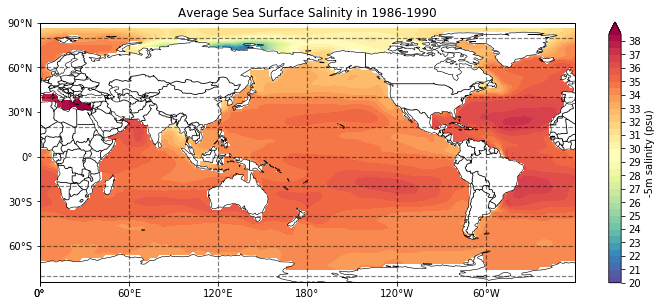

In [19]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': '-5m salinity (psu)',
   'shrink': 0.6,
   'ticks': np.arange(20,39,1)
}
levels = np.arange(20,39,0.5)
sali.plot.contourf(ax=ax, levels=levels, cmap='Spectral_r', 
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("Average Sea Surface Salinity in 1986-1990")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('1986-90 Ave_Salinity.png')
fig.show()

### Sea surface height z0

In [6]:
ssheight = ds['z0'][0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    ssheight = ssheight + ds['z0'][0]
ssheight = ssheight/len(list)

In [10]:
ssheight.shape

(115, 182)

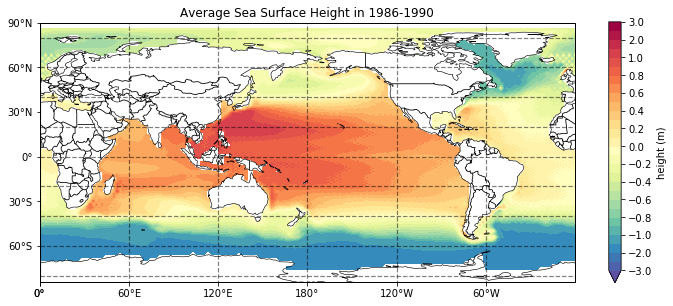

In [17]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'height (m)',
   'shrink': 0.6,
   'ticks': [-3,-2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,2,3]
}
levels = [-3,-2.5,-2,-1.5,-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,2.5,3]
ssheight.plot.contourf(ax=ax, levels=levels, cmap='Spectral_r', 
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("Average Sea Surface Height in 1986-1990")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('1986-90 Ave_SSHeight.png')
fig.show()

### Surface Current us

In [149]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
ds['us'].coords['lev']

<xarray.DataArray 'lev' (lev: 30)>
array([-5.000000e+00, -1.500000e+01, -2.500000e+01, -3.500000e+01,
       -4.500000e+01, -5.500000e+01, -6.500000e+01, -7.500000e+01,
       -8.500000e+01, -9.500000e+01, -1.050000e+02, -1.150000e+02,
       -1.250000e+02, -1.350000e+02, -1.450000e+02, -1.569303e+02,
       -1.784277e+02, -2.225018e+02, -3.031057e+02, -4.325961e+02,
       -6.211931e+02, -8.765334e+02, -1.203337e+03, -1.603200e+03,
       -2.074526e+03, -2.612596e+03, -3.209772e+03, -3.855835e+03,
       -4.538428e+03, -5.243597e+03], dtype=float32)
Coordinates:
  * lev      (lev) float32 -5.0 -15.0 -25.0 ... -3855.8352 -4538.4277 -5243.5967
Attributes:
    long_name:  depth (on T grids)
    units:      meter

In [150]:
Uscur = (ds['us'][0,0] + ds['us'][0,1] + ds['us'][0,2] + ds['us'][0,3] + ds['us'][0,4])/5
Vscur = (ds['vs'][0,0] + ds['vs'][0,1] + ds['vs'][0,2] + ds['vs'][0,3] + ds['vs'][0,4])/5
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    Uscur = Uscur +(ds['us'][0,0] + ds['us'][0,1] + ds['us'][0,2] + ds['us'][0,3] + ds['us'][0,4])/5
    Vscur = Vscur + (ds['vs'][0,0] + ds['vs'][0,1] + ds['vs'][0,2] + ds['vs'][0,3] + ds['vs'][0,4])/5
Uscur = Uscur/len(list)
Vscur = Vscur/len(list)

In [151]:
#Uscur = (ds['us'][0,0] + ds['us'][0,1] + ds['us'][0,2] + ds['us'][0,3] + ds['us'][0,4])/5
Uscur.shape
#S_us = np.power(Uscur*Uscur+Vscur*Vscur,0.5) #行不通q

(115, 182)

In [152]:
lat = Uscur.coords['lat'].values
lon = Uscur.coords['lon'].values

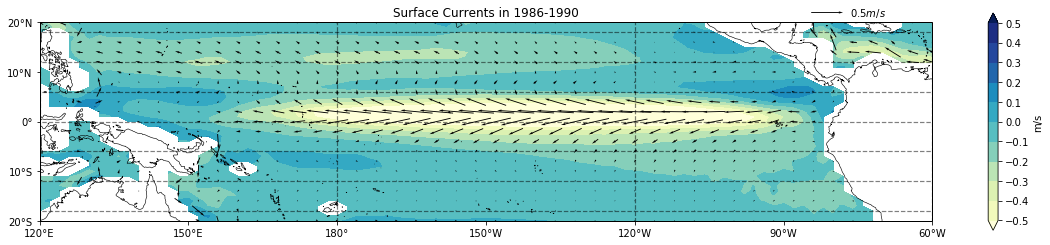

In [180]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(20,10))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
#ax.add_feature(cfeat.BORDERS.with_scale('50m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([120, 150, 180, 210, 240, 270, 300], crs=ccrs.PlateCarree())
ax.set_yticks([-20,-10, 0, 10, 20], crs=ccrs.PlateCarree())
ax.set_extent([120, 300, -20, 20], ccrs.PlateCarree())

#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False

# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#纬向流 叠加
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'm/s',
   'shrink': 0.4,
   'ticks': np.arange(-0.5,0.6,0.1)
}
my_map=mpl.colors.ListedColormap(['white','dodgerblue', 'cyan','lightgreen','green','yellow','tan','orange','darkorange','red','crimson','fuchsia','purple'])
levels = np.arange(-0.5,0.6,0.1)
S_us.plot.contourf(ax=ax, levels=levels, cmap='YlGnBu',  #gist_rainbow_r
     cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())

#画风速矢量
uv = ax.quiver(lon[::2], lat[::2], Uscur.values[::2,::2], Vscur.values[::2,::2],pivot='mid',
        width=0.001,scale=14,headwidth=2.5,transform=ccrs.PlateCarree()) 
qk = ax.quiverkey(uv, 0.9, 1.05, 0.5, r'$0.5 m/s$', labelpos='E',
                   transform=ccrs.PlateCarree())



ax.set_title("Surface Currents in 1986-1990")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('1986-90Surface_Current.png')
fig.show()

### surface zonal current

In [143]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
S_us = ds['us'][0, 0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    S_us = S_us + ds['us'][0, 0]
S_us = S_us/len(list)

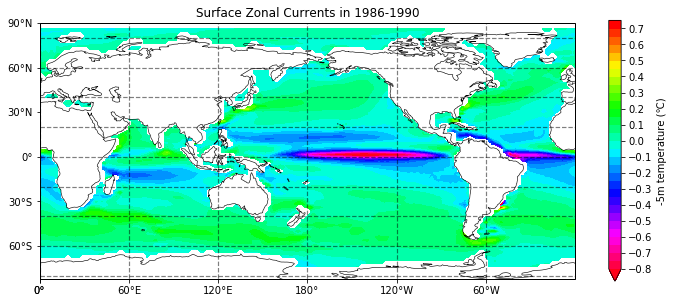

In [6]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
#ax.add_feature(cfeat.BORDERS.with_scale('50m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False

# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cbar_kwargs = {
   'orientation': 'vertical',
   'label': '-5m temperature (℃)',
   'shrink': 0.6,
   'ticks': np.arange(-0.8,0.8,0.1)
}
levels = np.arange(-0.8,0.8,0.05)
S_us.plot.contourf(ax=ax, levels=levels, cmap='hsv_r',  #gist_rainbow_r
     cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
#画风速矢量
# uv = ax.quiver(lon[::2], lat[::2], Uscur.values[::2,::2], Vscur.values[::2,::2],pivot='mid',
#         width=0.001,scale=14,headwidth=2.5,transform=ccrs.PlateCarree()) 
# qk = ax.quiverkey(uv, 0.9, 1.05, 0.5, r'$0.5 m/s$', labelpos='E',
#                    transform=ccrs.PlateCarree())
ax.set_title("Surface Zonal Currents in 1986-1990")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('1986-90Surface_Current.png')
fig.show()

In [34]:
#save for comparation in next two experience
np.savetxt('Ctrl_86-90Sus.csv',S_us, fmt='%.8f',delimiter=',')

## 正压流函数 bsf（等压线类）

In [7]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
bsf = ds['bsf'][0] 
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    bsf = bsf + ds['bsf'][0]
bsf = bsf/len(list)

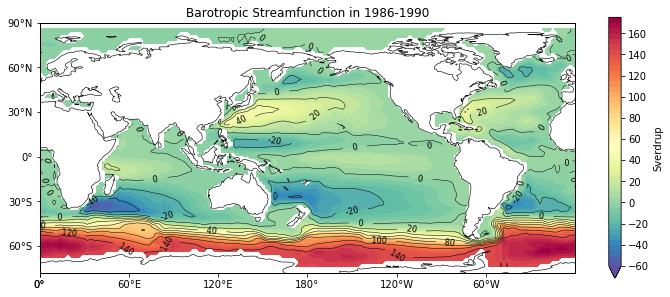

In [9]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
#ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#     linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'Sverdrup',
   'shrink': 0.6,
   'ticks': np.arange(-60,180,20)
}
levels = np.arange(-60,180,5)
filled_c = bsf.plot.contourf(ax=ax, levels=levels, cmap='Spectral_r',
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())

# Add black line contours.
plt.rcParams['contour.negative_linestyle'] = 'dashed'
levelc = np.arange(-60,160,20)
line_c = bsf.plot.contour(ax=ax, levels=levelc, colors=['black'],linewidths=0.5,
                         transform=ccrs.PlateCarree())

 # Use the line contours to place contour labels.
ax.clabel(
    line_c,  # Typically best results when labelling line contours.
    colors=['black'],
    fontsize=8,
    manual=False,  # Automatic placement vs manual placement.
    inline=True,  # Cut the line where the label will be placed.
    fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
)

ax.set_title("Barotropic Streamfunction in 1986-1990")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('1986-90bsf.png')
fig.show()

## 经圈流函数 psi（垂直类）

In [4]:
ds = xr.open_dataset(rootdir+list[0],decode_times=False)
psi = ds['psi'][0]
for i in range(1,len(list)):
    ds = xr.open_dataset(rootdir+list[i],decode_times=False)
    psi = psi + ds['psi'][0]
psi = psi/len(list)

In [31]:
#save temp for comparation in next two experience
np.savetxt('./satility/Ctrl_86-90psi.csv',psi, fmt='%.8f',delimiter=',')

In [5]:
psi.coords['lat'] = psi.coords['lat'][::-1]  #逆序
#重新构造
new = psi.values
lev = psi.coords['lev1'].values
lat = psi.coords['lat'].values
lat1=lat.copy()
lat = lat1[::-1]
lat=lat*-1
newpsi = xr.DataArray(new,coords=[lev,lat],dims=['Depth','Latitude'])

[Text(0, 0, '0'),
 Text(0, 0, '80° N'),
 Text(0, 0, '60° N'),
 Text(0, 0, '40° N'),
 Text(0, 0, '20° N'),
 Text(0, 0, '0'),
 Text(0, 0, '20° S'),
 Text(0, 0, '40° S'),
 Text(0, 0, '60° S')]

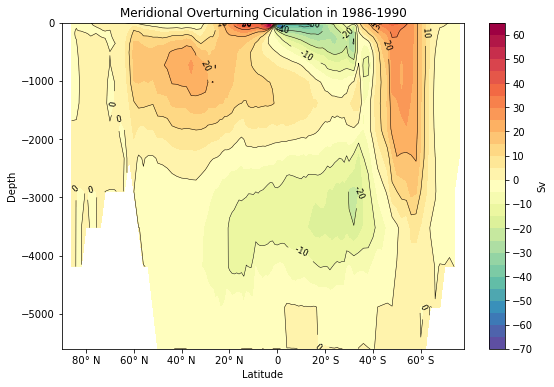

In [8]:
#plot
fig, ax = plt.subplots(figsize=(9,6))
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'Sv',
  # 'shrink': 0.8,
   'ticks': np.arange(-70,70,10)
}
levels = np.arange(-70,70,5)
newpsi.plot.contourf(ax=ax, levels=levels,cbar_kwargs=cbar_kwargs, cmap='Spectral_r')

# Add black line contours.
plt.rcParams['contour.negative_linestyle'] = 'dashed'
levelc = np.arange(-50,40,10)
line_c = newpsi.plot.contour(ax=ax, levels=levelc, colors=['black'],linewidths=0.5)

 # Use the line contours to place contour labels.
ax.clabel(
    line_c,  # Typically best results when labelling line contours.
    colors=['black'],
    fontsize=8,
    manual=False,  # Automatic placement vs manual placement.
    inline=True,  # Cut the line where the label will be placed.
    fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
)
#cs = ax.contourf(LAT, LEV, ver_Temp, levels=levels, cmap='Spectral_r')
#cbar = fig.colorbar(cs)
ax.set_title("Meridional Overturning Ciculation in 1986-1990")  # Add a title to the axes.
tick = ['0','80° N','60° N','40° N','20° N','0','20° S','40° S','60° S']
ax.set_xticklabels(tick)

#plt.savefig('1986-90psi.png')